In [1]:
import numpy as np
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r"C:\Users\91852\Downloads\DS internship\EDA Project\data.xlsx")

In [3]:
numerical = df.select_dtypes(include = ['int64', 'float64'])

In [4]:
from datetime import date

In [5]:
df['DOL']=np.where(df['DOL']=='present', date.today(), df['DOL'])

In [6]:
df['DOL'] = pd.to_datetime(df['DOL'])

In [7]:
df['Working_days']=df['DOL']-df['DOJ']

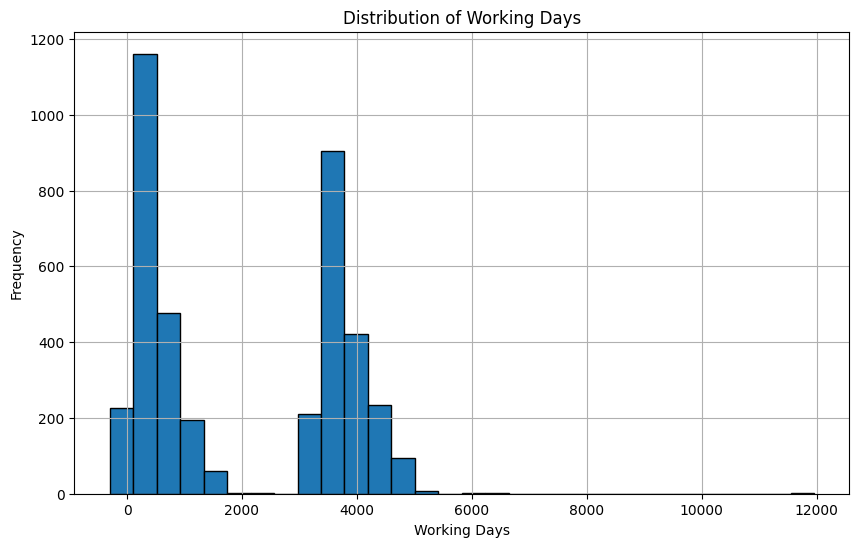

In [8]:
df['Working_days'] = df['Working_days'].dt.days

plt.figure(figsize=(10, 6))
plt.hist(df['Working_days'], bins=30, edgecolor='black') 
plt.title('Distribution of Working Days')
plt.xlabel('Working Days')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:
def calculateAge(dob):
    today = date.today()
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age

In [10]:
df['Age'] = df['DOB'].apply(calculateAge)

<Axes: title={'center': 'Histogram of Age'}, ylabel='Frequency'>

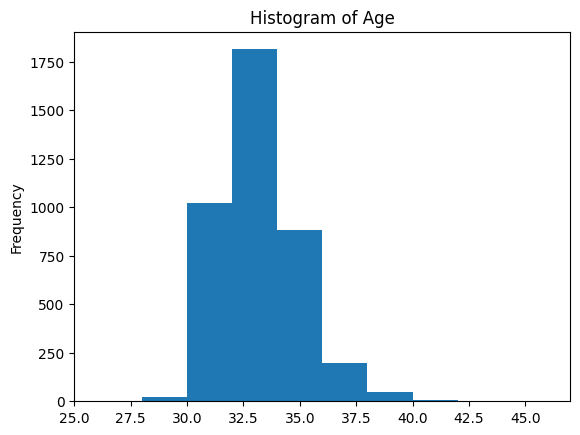

In [72]:
df['Age'].plot(kind='hist', title="Histogram of Age")

<Axes: title={'center': 'Gender (m:male, f:female)'}, xlabel='Gender'>

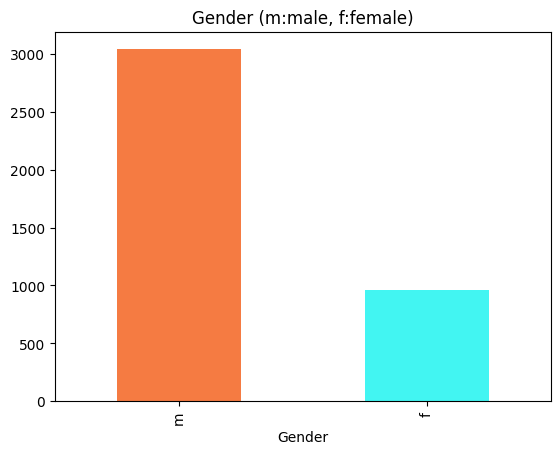

In [58]:
df['Gender'].value_counts().plot(kind='bar', color=['#f57b42', '#42f5f2'], title='Gender (m:male, f:female)')



In [13]:
desig = df['Designation'].value_counts()

In [14]:
fil_desig = desig[desig>=50].index

<Axes: title={'center': 'Designations in which there are more than 50 candidates'}, xlabel='Designation'>

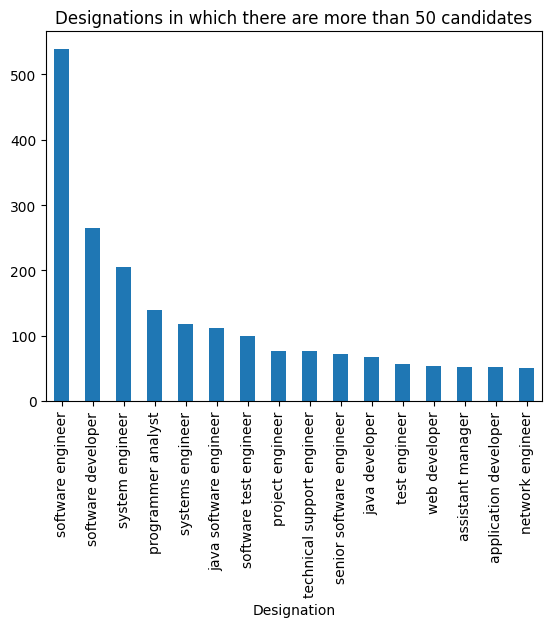

In [15]:
df[df['Designation'].isin(fil_desig)].Designation.value_counts().plot(kind='bar', title='Designations in which there are more than 50 candidates')

### JobCity

In [16]:
df.loc[df['JobCity'] == -1, 'JobCity'] = np.nan

In [17]:
df['JobCity'].value_counts()

JobCity
Bangalore           627
Noida               368
Hyderabad           335
Pune                290
Chennai             272
                   ... 
Asansol               1
Tirunelvelli          1
Ernakulam             1
Nanded                1
Asifabadbanglore      1
Name: count, Length: 338, dtype: int64

In [18]:
df['JobCity'].isna().sum()

461

In [19]:
df['JobCity'].bfill(inplace=True)

In [20]:
df['JobCity_strip'] = df['JobCity'].str.lower().str.strip()

In [21]:
df['JobCity_strip'].str.replace(r'\(.*\)|,.*| /.*| /.*|-.*',"", regex=True).unique()

array(['bangalore', 'indore', 'chennai', 'gurgaon', 'manesar',
       'hyderabad', 'banglore', 'noida', 'kolkata', 'pune', 'mohali',
       'jhansi', 'delhi', 'bhubaneswar', 'navi mumbai', 'mumbai',
       'new delhi', 'mangalore', 'rewari', 'gaziabaad', 'bhiwadi',
       'mysore', 'rajkot', 'greater noida', 'jaipur', 'thane',
       'maharajganj', 'thiruvananthapuram', 'punchkula', 'bhubaneshwar',
       'coimbatore', 'dhanbad', 'lucknow', 'trivandrum', 'gandhi nagar',
       'una', 'daman and diu', 'gurgoan', 'vsakhapttnam', 'nagpur',
       'bhagalpur', 'new delhi ', 'ahmedabad', 'kochi/cochin', 'bankura',
       'bengaluru', 'kanpur', 'vijayawada', 'kochi', 'beawar', 'alwar',
       'siliguri', 'raipur', 'bhopal', 'faridabad', 'jodhpur', 'udaipur',
       'muzaffarpur', 'kolkata`', 'bulandshahar', 'haridwar', 'raigarh',
       'visakhapatnam', 'jabalpur', 'unnao', 'aurangabad', 'belgaum',
       'dehradun', 'rudrapur', 'jamshedpur', 'vizag', 'nouda',
       'dharamshala', 'banagalo

In [22]:
df['JobCity_strip'].replace("ncr", "delhi", regex=False)

0              bangalore
1                 indore
2                chennai
3                gurgaon
4                manesar
              ...       
3993           new delhi
3994           hyderabad
3995           bangalore
3996    asifabadbanglore
3997             chennai
Name: JobCity_strip, Length: 3998, dtype: object

In [23]:
valid_cities = ["latur","sadulpur","Bangalore", "Mumbai", "Chennai", "Delhi", "Hyderabad", "Kolkata", "Pune", "Ahmedabad", "Jaipur", "Surat", "Lucknow", "Kanpur", "Nagpur", "Visakhapatnam", "Indore", "Thane", "Bhopal", "Patna", "Vadodara", "Ghaziabad", "Ludhiana", "Coimbatore", "Agra", "Madurai", "Nashik", "Vijayawada", "Faridabad", "Meerut", "Rajkot", "Srinagar", "Aurangabad", "Dhanbad", "Amritsar", "Allahabad", "Ranchi", "Howrah", "Jabalpur", "Gwalior", "Jodhpur", "Raipur", "Kota", "Guwahati", "Chandigarh", "Solapur", "Hubli–Dharwad", "Bareilly", "Moradabad", "Mysore", "Gurgaon", "Aligarh", "Jalandhar", "Tiruchirappalli", "Bhubaneswar", "Salem", "Warangal", "Guntur", "Bhiwandi", "Saharanpur", "Gorakhpur", "Bikaner", "Amravati", "Noida", "Jamshedpur", "Bhilai", "Cuttack", "Firozabad", "Kochi", "Nellore", "Bhavnagar", "Dehradun", "Durgapur", "Asansol", "Rourkela", "Nanded", "Kolhapur", "Ajmer", "Akola", "Gulbarga", "Jamnagar", "Ujjain", "Loni", "Siliguri", "Jhansi", "Ulhasnagar", "Jammu", "Sangli-Miraj & Kupwad", "Mangalore", "Erode", "Belgaum", "Kurnool", "Ambattur", "Rajahmundry", "Tirunelveli", "Malegaon", "Gaya", "Tirupur", "Davanagere", "Kozhikode", "Akbarpur", "Uluberia", "Katihar", "Kakinada", "Munger", "Dewas", "Karimnagar", "Aizawl", "Ichalkaranji", "Tirupati", "Karnal", "Bathinda", "Rampur", "Shivamogga", "Ratlam", "Modinagar", "Durg", "Shillong", "Imphal", "Hapur", "Ranipet", "Anantapur", "Arrah", "Karawal Nagar", "Parbhani", "Etawah", "Bharatpur", "Begusarai", "Chittoor", "Saharsa", "Sirsa", "Sultan Pur Majra", "Bhilwara", "Guna", "Jaunpur", "Unnao", "Mirzapur", "Sonipat", "Anand", "Puruliya", "Nabadwip", "Kharagpur", "Baidyabati", "Darjeeling", "Kanchrapara", "Haldia", "Madhyamgram", "Kolkata", "Bidhan Nagar", "Alipore", "Basirhat", "Kalyani", "Barrackpur", "Habra", "Santipur", "Ranaghat", "Bangalore", "Gangtok", "Panchkula", "Tiruvottiyur", "Pallavaram", "Kamarhati", "Bally", "Baranagar", "Dum Dum", "Suryapet", "Changanassery", "Punalur", "Kottayam", "Thodupuzha", "Chalakudy", "Muvattupuzha", "Kunnamkulam", "Palakkad", "Ponnani", "Vatakara", "Kanhangad", "Kasaragod", "Kochi", "Kayamkulam", "Neyyattinkara", "Attingal", "Kollam", "Pathanamthitta", "Vaikom", "Alappuzha"]
valid_cities_lower = [i.lower() for i in valid_cities]

In [24]:
from fuzzywuzzy import process
def correct_spelling(target_word = '', choices = [], threshold=80):
    match, score = process.extractOne(target_word, choices)
    if score >= threshold:
        return match
    else:
        return target_word

In [25]:
df['JobCity_preprocessed'] = df['JobCity_strip'].apply(lambda x: correct_spelling(str(x), valid_cities_lower))

<Axes: title={'center': 'JobCity with count > 10'}, xlabel='JobCity_preprocessed'>

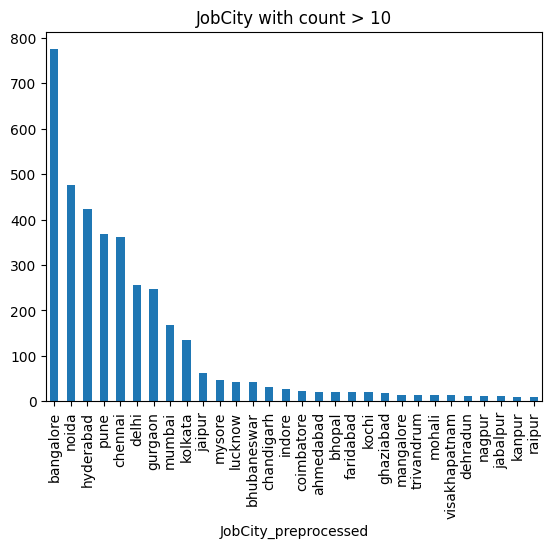

In [51]:
df[df['JobCity_preprocessed'].map(df['JobCity_preprocessed'].value_counts()) >= 10]['JobCity_preprocessed'].value_counts().plot(kind='bar', title='JobCity with count > 10')

### 10th Board

In [27]:
df['10board'] = df['10board'].str.strip().str.lower()

In [28]:
df['10board'].nunique()

272

In [29]:
df['10board'] = df['10board'].str.replace('cicse', "icse", regex=False)

In [30]:
df['10board'] = df['10board'].str.replace('council for indian school certificate examination', "icse", regex=False)

In [52]:
df['10board'] = df['10board'].str.replace('icse board', "icse", regex=False)
df['10board'] = df['10board'].str.replace('icse , new delhi', 'icse', regex=False)


In [32]:
df['10board'] = df['10board'].str.replace('central board of secondary education', "cbse", regex=False)

In [33]:
df['10board'] = df['10board'].str.replace('cbse[gulf zone]', "cbse", regex=False)

In [34]:
df['10board'] = df['10board'].str.replace('cbsc', "cbse", regex=False)

In [35]:
df['10board'] = df['10board'].str.replace('central board of secondary education, new delhi', "cbse", regex=False)

In [36]:
df['10board'] = df['10board'].str.replace('cbse board', "cbse", regex=False)

In [37]:
df['10board'] = df['10board'].str.replace('cbse, new delhi', "cbse", regex=False)

In [38]:
df['10board'].isna().sum()

350

In [39]:
df['10board'].fillna(df['10board'].mode()[0], inplace=True)

In [40]:
state_board=['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'matric board',
       'board of secondary education',
       'west bengal board of secondary education',
       'jharkhand secondary examination board,ranchi', 'u p board',
       'bseb,patna', 'hsc', 'bse', 'sss pune',
       'karnataka education board (keeb)', 'kerala',
       'state board of secondary education( ssc)', 'gsheb',
       'up(allahabad)', 'nagpur', 'don bosco maatriculation school',
       'karnataka state secondary education board', 'maharashtra',
       'karnataka secondary education board',
       'himachal pradesh board of school education',
       'certificate of middle years program of ib',
       'karnataka board of secondary education',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'board of secendary education orissa',
       'karantaka secondary education and examination borad', 'hbsc',
       'kseeb(karnataka secondary education examination board)',
       'cbse[gulf zone]', 'hbse', 'state(karnataka board)',
       'jharkhand accademic council',
       'jharkhand secondary examination board (ranchi)',
       'karnataka secondary education examination board', 'delhi board',
       'mirza ahmed ali baig', 'jseb', 'bse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'upbhsie', 'secondary board of rajasthan',
       'tamilnadu matriculation board', 'jharkhand secondary board',
       'board of secondary education,andhara pradesh', 'up baord',
       'state', 'board of intermediate education',
       'state board of secondary education,andhra pradesh',
       'up board , allahabad',
       'stjosephs girls higher sec school,dindigul', 'maharashtra board',
       'education board of kerala', 'board of ssc',
       'maharashtra state board pune',
       'board of school education harayana',
       'secondary school cerfificate', 'maharashtra sate board', 'ksseb',
       'bihar examination board, patna', 'latur',
       'board of secondary education, rajasthan', 'state borad hp',
       'cluny', 'bsepatna', 'up borad', 'ssc board of andrapradesh',
       'matric', 'bse,orissa', 'ssc-andhra pradesh', 'mp',
       'karnataka education board', 'mhsbse',
       'karnataka sslc board bangalore', 'karnataka', 'u p',
       'secondary school of education', 'state board of karnataka',
       'karnataka secondary board', 'andhra pradesh board ssc',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'hse,orissa', 'national public school', 'nagpur board',
       'jharkhand academic council', 'bsemp',
       'board of secondary education, andhra pradesh',
       'board of secondary education orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of secondary education,ap',
       'board of secondary education,andhra pradesh',
       'jawahar navodaya vidyalaya', 'aisse',
       'karnataka board of higher education', 'bihar',
       'kerala state board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'bharathi matriculation school', 'uttaranchal state board',
       'wbbsce', 'mp state board', 'seba(assam)', 'anglo indian', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'msbshse,pune', 'tamilnadu state board', 'kerala university',
       'uttaranchal shiksha avam pariksha parishad',
       'bse(board of secondary education)',
       'bright way college, (up board)',
       'school secondary education, andhra pradesh',
       'secondary state certificate',
       'maharashtra state board of secondary and higher secondary education,pune',
       'andhra pradesh state board', 'stmary higher secondary', 'cgbse',
       'secondary school certificate', 'rajasthan board ajmer', 'mpbse',
       'pune board', 'board of secondary education,orissa',
       'maharashtra state board,pune', 'up bord',
       'kiran english medium high school', 'state board (jac, ranchi)',
       'gujarat board', 'sarada high scchool',
       'kalaimagal matriculation higher secondary school',
       'karnataka board', 'maharastra board', 'sslc board',
       'ssc maharashtra board', 'tamil nadu state', 'uttrakhand board',
       'bihar secondary education board,patna',
       'haryana board of school education',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ksseb(karnataka state board)', 'nashik board',
       'jharkhand secondary education board', 'himachal pradesh board',
       'maharashtra satate board',
       'maharashtra state board mumbai divisional board',
       'dav public school,hehal',
       'state board of secondary education, ap',
       'rajasthan board of secondary education', 'hsce',
       'karnataka secondary education',
       'board of secondary education,odisha', 'maharashtra nasik board',
       'west bengal board of secondary examination (wbbse)',
       'holy cross matriculation hr sec school', 'cbsc', 'apssc',
       'bseb patna', 'kolhapur', 'bseb, patna', 'up board allahabad',
       'biharboard', 'nagpur board,nagpur', 'pune', 'gyan bharati school',
       'rbse,ajmer', 'board of secondaray education',
       'secondary school education', 'state bord', 'jbse,jharkhand',
       'hse', 'madhya pradesh board', 'bihar school examination board',
       'west bengal board of secondary eucation', 'state boardmp board',
       'icse board , new delhi',
       'board of secondary education (bse) orissa',
       'maharashtra state board for ssc',
       'board of secondary school education', 'latur board',
       "stmary's convent inter college", 'nagpur divisional board',
       'ap state board', 'cgbse raipur', 'uttranchal board', 'ksbe',
       'central board of secondary education, new delhi',
       'bihar school examination board patna', 'cbse board',
       'sslc,karnataka', 'mp-bse', 'up bourd', 'dav public school sec 14',
       'board of school education haryana', 'aurangabad board',
       'j&k state board of school education',
       'maharashtra state board of secondary and higher secondary education',
       'maharashtra state boar of secondary and higher secondary education',
       'ssc regular', 'karnataka state examination board', 'nasik',
       'west bengal  board of secondary education', 'up board,allahabad',
       'bseb ,patna',
       'state board - west bengal board of secondary education : wbbse',
       'maharashtra state board of secondary & higher secondary education',
       'delhi public school', 'karnataka secondary eduction',
       'secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)', 'apsche',
       'board of  secondary education',
       'board of high school and intermediate education uttarpradesh',
       'kea', 'board of secondary education - andhra pradesh',
       'ap state board for secondary education', 'seba',
       'punjab school education board, mohali',
       'jharkhand acedemic council', 'hse,board',
       'board of ssc education andhra pradesh', 'up-board', 'bse,odisha']

items_to_remove = ['cbse', 'icse', 'icse board', 'central board of secondary education', 'cbse[gulf zone]', 'cbsc', 
                   'central board of secondary education, new delhi','cbse board', 'cbse, new delhi', 'icse , new delhi']

state_board = [item for item in state_board if item not in items_to_remove]

In [41]:
for i in state_board:
    for index, row in df.iterrows():
        if row['10board'] == i:
            df.loc[index, '10board'] = 'ssc'

<Axes: title={'center': '10th Boards'}, xlabel='10board'>

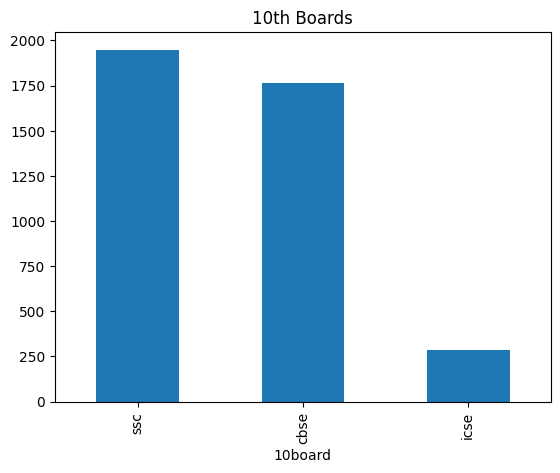

In [54]:
df['10board'].value_counts().plot(kind='bar', title='10th Boards')

### 12th board

In [43]:
df.loc[df['12board'] == 0, '12board'] = np.nan

In [44]:
df['12board'] = df['10board'].str.strip().str.lower()

In [45]:
df['12board'].fillna(df['12board'].mode()[0], inplace=True)

In [46]:
state_boards_12=['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'matric board',
       'board of secondary education',
       'west bengal board of secondary education',
       'jharkhand secondary examination board,ranchi', 'u p board',
       'bseb,patna', 'hsc', 'bse', 'sss pune',
       'karnataka education board (keeb)', 'kerala',
       'state board of secondary education( ssc)', 'gsheb',
       'up(allahabad)', 'nagpur', 'don bosco maatriculation school',
       'karnataka state secondary education board', 'maharashtra',
       'karnataka secondary education board',
       'himachal pradesh board of school education',
       'certificate of middle years program of ib',
       'karnataka board of secondary education',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'board of secendary education orissa',
       'karantaka secondary education and examination borad', 'hbsc',
       'kseeb(karnataka secondary education examination board)',
       'cbse[gulf zone]', 'hbse', 'state(karnataka board)',
       'jharkhand accademic council',
       'jharkhand secondary examination board (ranchi)',
       'karnataka secondary education examination board', 'delhi board',
       'mirza ahmed ali baig', 'jseb', 'bse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'upbhsie', 'secondary board of rajasthan',
       'tamilnadu matriculation board', 'jharkhand secondary board',
       'board of secondary education,andhara pradesh', 'up baord',
       'state', 'board of intermediate education',
       'state board of secondary education,andhra pradesh',
       'up board , allahabad',
       'stjosephs girls higher sec school,dindigul', 'maharashtra board',
       'education board of kerala', 'board of ssc',
       'maharashtra state board pune',
       'board of school education harayana',
       'secondary school cerfificate', 'maharashtra sate board', 'ksseb',
       'bihar examination board, patna', 'latur',
       'board of secondary education, rajasthan', 'state borad hp',
       'cluny', 'bsepatna', 'up borad', 'ssc board of andrapradesh',
       'matric', 'bse,orissa', 'ssc-andhra pradesh', 'mp',
       'karnataka education board', 'mhsbse',
       'karnataka sslc board bangalore', 'karnataka', 'u p',
       'secondary school of education', 'state board of karnataka',
       'karnataka secondary board', 'andhra pradesh board ssc',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'hse,orissa', 'national public school', 'nagpur board',
       'jharkhand academic council', 'bsemp',
       'board of secondary education, andhra pradesh',
       'board of secondary education orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of secondary education,ap',
       'board of secondary education,andhra pradesh',
       'jawahar navodaya vidyalaya', 'aisse',
       'karnataka board of higher education', 'bihar',
       'kerala state board', 'cicse', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'bharathi matriculation school', 'uttaranchal state board',
       'wbbsce', 'mp state board', 'seba(assam)', 'anglo indian', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'msbshse,pune', 'tamilnadu state board', 'kerala university',
       'uttaranchal shiksha avam pariksha parishad',
       'bse(board of secondary education)',
       'bright way college, (up board)',
       'school secondary education, andhra pradesh',
       'secondary state certificate',
       'maharashtra state board of secondary and higher secondary education,pune',
       'andhra pradesh state board', 'stmary higher secondary', 'cgbse',
       'secondary school certificate', 'rajasthan board ajmer', 'mpbse',
       'pune board', 'board of secondary education,orissa',
       'maharashtra state board,pune', 'up bord',
       'kiran english medium high school', 'state board (jac, ranchi)',
       'gujarat board', 'sarada high scchool',
       'kalaimagal matriculation higher secondary school',
       'karnataka board', 'maharastra board', 'sslc board',
       'ssc maharashtra board', 'tamil nadu state', 'uttrakhand board',
       'bihar secondary education board,patna',
       'haryana board of school education',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ksseb(karnataka state board)', 'nashik board',
       'jharkhand secondary education board', 'himachal pradesh board',
       'maharashtra satate board',
       'maharashtra state board mumbai divisional board',
       'dav public school,hehal',
       'state board of secondary education, ap',
       'rajasthan board of secondary education', 'hsce',
       'karnataka secondary education',
       'board of secondary education,odisha', 'maharashtra nasik board',
       'west bengal board of secondary examination (wbbse)',
       'holy cross matriculation hr sec school', 'cbsc', 'apssc',
       'bseb patna', 'kolhapur', 'bseb, patna', 'up board allahabad',
       'biharboard', 'nagpur board,nagpur', 'pune', 'gyan bharati school',
       'rbse,ajmer', 'board of secondaray education',
       'secondary school education', 'state bord', 'jbse,jharkhand',
       'hse', 'madhya pradesh board', 'bihar school examination board',
       'west bengal board of secondary eucation', 'state boardmp board',
       'icse board , new delhi',
       'board of secondary education (bse) orissa',
       'maharashtra state board for ssc',
       'board of secondary school education', 'latur board',
       "stmary's convent inter college", 'nagpur divisional board',
       'ap state board', 'cgbse raipur', 'uttranchal board', 'ksbe',
       'central board of secondary education, new delhi',
       'bihar school examination board patna', 'cbse board',
       'sslc,karnataka', 'mp-bse', 'up bourd', 'dav public school sec 14',
       'board of school education haryana',
       'council for indian school certificate examination',
       'aurangabad board', 'j&k state board of school education',
       'maharashtra state board of secondary and higher secondary education',
       'maharashtra state boar of secondary and higher secondary education',
       'ssc regular', 'karnataka state examination board', 'nasik',
       'west bengal  board of secondary education', 'up board,allahabad',
       'bseb ,patna',
       'state board - west bengal board of secondary education : wbbse',
       'maharashtra state board of secondary & higher secondary education',
       'delhi public school', 'karnataka secondary eduction',
       'secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)', 'apsche',
       'board of  secondary education',
       'board of high school and intermediate education uttarpradesh',
       'kea', 'board of secondary education - andhra pradesh',
       'ap state board for secondary education', 'seba',
       'punjab school education board, mohali',
       'jharkhand acedemic council', 'hse,board',
       'board of ssc education andhra pradesh', 'up-board', 'bse,odisha']

exclude = ['cbse', 'isc','icse', 'icse board', 'central board of secondary education', 'cicse', 'icse board , new delhi', 
           'cbse[gulf zone]', 'cbse board', 'central board of secondary education, new delhi', 'cbsc']

state_boards_12=[i for i in state_boards_12 if i not in exclude]

In [47]:
for i in state_boards_12:
    for index, row in df.iterrows():
        if row['12board'] == i:
            df.loc[index, '12board'] = 'state board'

In [48]:
df['12board'] = df['12board'].str.replace('state board', 'ssc', regex=False)
df['12board'] = df['12board'].str.replace('isc', 'icse', regex=False)
df['12board'] = df['12board'].str.replace('icse board', 'icse', regex=False)
df['12board'] = df['12board'].str.replace('cicse', 'icse', regex=False)
df['12board'] = df['12board'].str.replace('icse board , new delhi', 'icse', regex=False)
df['12board'] = df['12board'].str.replace('central board of secondary education', 'cbse', regex=False)
df['12board'] = df['12board'].str.replace('cbse[gulf zone]', 'cbse', regex=False)
df['12board'] = df['12board'].str.replace('cbse board', 'cbse', regex=False)
df['12board'] = df['12board'].str.replace('central board of secondary education, new delhi', 'cbse', regex=False)
df['12board'] = df['12board'].str.replace('cbsc', 'cbse', regex=False)
df['12board'] = df['12board'].str.replace('icse , new delhi', 'icse', regex=False)
df['12board'] = df['12board'].str.replace('cbse, new delhi', 'cbse', regex=False)

<Axes: title={'center': '12th Boards'}, xlabel='12board'>

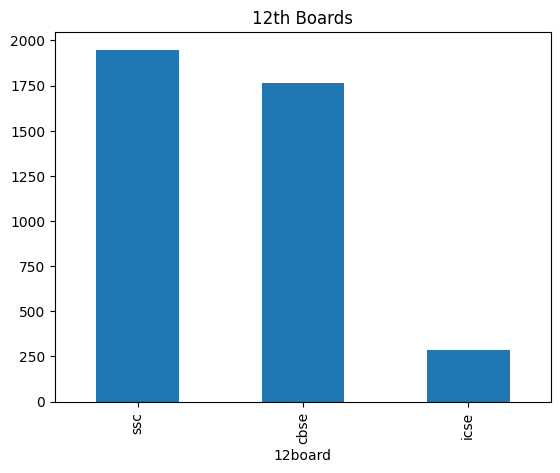

In [55]:
df['12board'].value_counts().plot(kind='bar', title='12th Boards')

<Axes: title={'center': 'Degree'}, xlabel='Degree'>

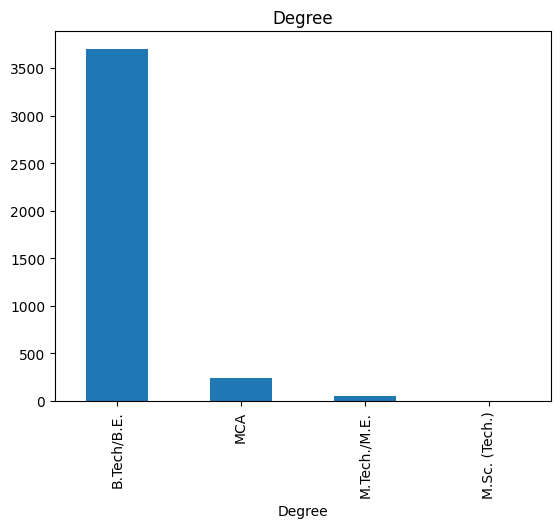

In [60]:
df['Degree'].value_counts().plot(kind='bar', title='Degree')

<Axes: title={'center': 'Most Common Specializations'}, ylabel='Specialization'>

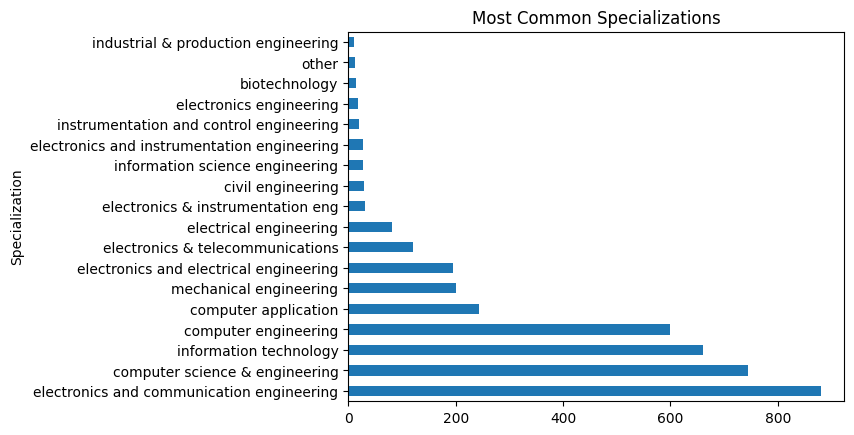

In [71]:

df[df['Specialization'].map(df['Specialization'].value_counts()) >= 10]['Specialization'].value_counts().plot(kind='barh', title='Most Common Specializations')

<Axes: title={'center': 'College States'}, xlabel='CollegeState'>

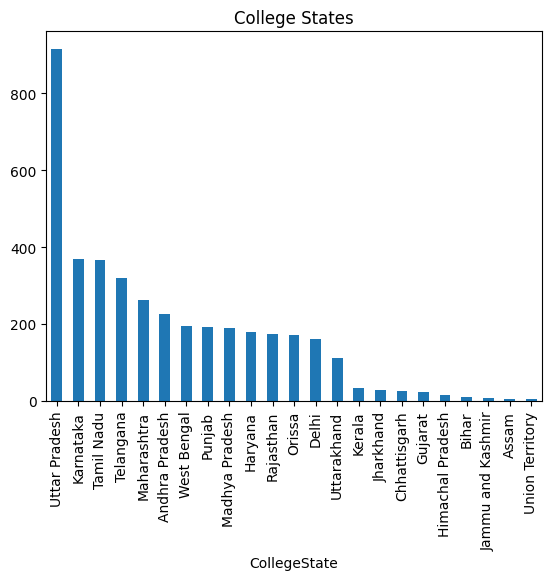

In [70]:
df[df['CollegeState'].map(df['CollegeState'].value_counts()) >= 5]['CollegeState'].value_counts().plot(kind='bar', title='College States')

##### Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you

In [73]:
df['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [74]:
df[df['Specialization']=='computer science & engineering']

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Working_days,Age,JobCity_strip,JobCity_preprocessed
6,train,947847,300000,2014-08-01,2015-05-01,java software engineer,Banglore,m,1993-02-01,86.08,...,-1,1.7081,-0.1054,-1.0379,-2.0092,-1.0872,273,31,banglore,bangalore
18,train,711342,120000,2014-01-01,2014-06-01,data entry operator,Gurgaon,m,1992-12-07,65.00,...,-1,-0.1590,0.3789,1.3933,-0.2344,1.4386,151,31,gurgaon,gurgaon
24,train,963123,335000,2014-06-01,2015-06-01,programmer analyst,Hyderabad,m,1993-06-28,88.00,...,-1,0.4155,0.8027,0.1357,-0.9950,-0.6692,365,30,hyderabad,hyderabad
25,train,350211,435000,2012-09-01,2024-02-23,systems analyst,Gurgaon,f,1991-03-02,86.80,...,-1,0.0464,1.2028,-0.9245,0.5323,-0.2875,4192,32,gurgaon,gurgaon
31,train,1094324,340000,2014-08-01,2015-04-01,software engineer,Bangalore,m,1992-10-23,77.20,...,-1,-0.0154,1.2114,1.0859,-1.5021,0.2889,243,31,bangalore,bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3969,train,1233826,330000,2015-06-01,2024-02-23,technical engineer,pune,m,1993-01-24,76.00,...,-1,0.5591,0.7119,0.0100,-0.2344,0.8637,3189,31,pune,pune
3975,train,1240207,300000,2014-07-01,2015-04-01,game developer,Noida,m,1991-06-03,86.00,...,-1,0.5591,0.5454,0.1637,0.3995,0.4805,274,32,noida,noida
3981,train,1077872,220000,2014-09-01,2024-02-23,software engineer,Gurgaon,m,1991-12-17,53.40,...,-1,0.1282,-0.2871,-0.1437,-1.1218,1.4386,3462,32,gurgaon,gurgaon
3989,train,1204604,300000,2014-09-01,2024-02-23,software engineer,Bangalore,m,1991-11-23,74.88,...,-1,0.1282,0.0459,1.2396,1.0333,0.6721,3462,32,bangalore,bangalore


In [75]:
df['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [76]:
df['Designation'] = df['Designation'].str.lower().str.strip()


In [99]:
df['Designation'] = df['Designation'].str.replace('sr.', 'senior')
df['Designation'] = df['Designation'].str.replace('jr.', 'junior')
df['Designation'] = df['Designation'].str.replace('system engineer', 'systems engineer')
df['Designation'] = df['Designation'].str.replace('programmer analyst', 'programming analyst')
df['Designation'] = df['Designation'].str.replace('programmer analyst trainee', 'programming analyst')
df['Designation'] = df['Designation'].str.replace('program analyst trainee', 'programming analyst')

df['Designation'] = df['Designation'].str.replace('software engineere', 'software engineer')

In [100]:
hyp = df[(df['Designation']=='programming analyst') | (df['Designation']==('software engineer')) | (df['Designation']==('hardware engineer')) | (df['Designation']==('associate engineer')) | (df['Designation']==('junior software engineer')) | (df['Designation']==('trainee software engineer')) | (df['Designation']==('software trainee engineer')) | (df['Designation']==('software engineer trainee'))]

In [101]:
df[(df['Designation'].str.contains('software'))]['Designation'].unique()

array(['senior software engineer', 'java software engineer',
       'associate software developer', 'software engineer',
       'associate software engineer', 'software developer',
       'junior software engineer', 'trainee software developer',
       'assistant software engineer', 'software test engineer',
       'trainee software engineer', 'senior software developer',
       'software development engineer', 'embedded software engineer',
       'software architect', 'software quality assurance tester',
       'software quality assurance analyst', 'software trainee',
       'junior software developer', 'software trainee engineer',
       'software tester', 'software engineer analyst',
       'principal software engineer', 'software devloper',
       'software engineer trainee', 'software enginner',
       'delivery software engineer', 'software engineer associate',
       'software analyst', 'software programmer', 'software engg',
       'software test engineerte', 'software test eng

In [106]:
hyp

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Working_days,Age,JobCity_strip,JobCity_preprocessed
19,train,466888,325000,2014-09-01,2024-02-23,software engineer,Pune,f,1990-11-30,79.00,...,-1,0.8192,0.2668,-0.2714,-0.40780,-0.1295,3462,33,pune,pune
20,train,140069,320000,2010-11-01,2012-09-01,software engineer,Bangalore,f,1988-07-25,91.20,...,-1,-0.1082,0.9688,0.5269,-0.29020,0.3444,670,35,bangalore,bangalore
21,train,339689,200000,2012-08-01,2013-12-01,software engineer,Hyderabad,f,1991-08-20,75.67,...,-1,-1.0355,-0.5913,-1.3599,0.06223,-1.3539,487,32,hyderabad,hyderabad
24,train,963123,335000,2014-06-01,2015-06-01,programming analyst,Hyderabad,m,1993-06-28,88.00,...,-1,0.4155,0.8027,0.1357,-0.99500,-0.6692,365,30,hyderabad,hyderabad
31,train,1094324,340000,2014-08-01,2015-04-01,software engineer,Bangalore,m,1992-10-23,77.20,...,-1,-0.0154,1.2114,1.0859,-1.50210,0.2889,243,31,bangalore,bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,train,212055,550000,2013-07-01,2014-04-01,software engineer,Bangalore,m,1989-07-22,69.16,...,-1,-0.5719,0.5008,-0.4891,0.41480,-1.2354,274,34,bangalore,bangalore
3981,train,1077872,220000,2014-09-01,2024-02-23,software engineer,Gurgaon,m,1991-12-17,53.40,...,-1,0.1282,-0.2871,-0.1437,-1.12180,1.4386,3462,32,gurgaon,gurgaon
3984,train,305041,480000,2011-12-01,2024-02-23,software engineer,Gurgaon,f,1990-01-18,89.80,...,-1,-0.2628,0.1888,0.3817,-0.29020,1.6082,4467,34,gurgaon,gurgaon
3989,train,1204604,300000,2014-09-01,2024-02-23,software engineer,Bangalore,m,1991-11-23,74.88,...,-1,0.1282,0.0459,1.2396,1.03330,0.6721,3462,32,bangalore,bangalore


In [103]:
sample_mean = hyp['Salary'].mean()
standard_error = st.sem(hyp['Salary'])

confidence_interval = st.norm.interval(0.95, loc=sample_mean, scale=standard_error)

In [104]:
if confidence_interval[0] > 250000 or confidence_interval[1] < 300000:
    print('We reject the null hypothesis and average salary is not between 250k and 300k.')
else:
    print('We fail to reject the null hypothesis and average salary is between 250k and 300k.')

We reject the null hypothesis and average salary is not between 250k and 300k.


##### Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)


In [86]:
ct = pd.crosstab(df['Gender'], df['Specialization'])
ct

Specialization,aeronautical engineering,applied electronics and instrumentation,automobile/automotive engineering,biomedical engineering,biotechnology,ceramic engineering,chemical engineering,civil engineering,computer and communication engineering,computer application,...,internal combustion engine,mechanical & production engineering,mechanical and automation,mechanical engineering,mechatronics,metallurgical engineering,other,polymer technology,power systems and automation,telecommunication engineering
Gender,,,,,,,,,,,,,,,,,,,,,
f,1,2,0,2,9,0,1,6,0,59,...,0,0,0,10,1,0,0,0,0,1
m,2,7,5,0,6,1,8,23,1,185,...,1,1,5,191,3,2,13,1,1,5


In [83]:
from scipy.stats import chi2_contingency

chi2, p_value, _, _ = chi2_contingency(ct)
alpha = 0.05

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

Chi-square statistic: 104.46891913608455
P-value: 1.2453868176976918e-06


In [84]:
if p_value < alpha:
    print("There is a significant difference in specialization depending on gender.")
else:
    print("There is no significant difference in specialization depending on gender.")

There is a significant difference in specialization depending on gender.
